# **E-Commerce Dataset EDA**

<div class="alert alert-success">  
<h3><strong>Imports</strong></h3>
</div>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
# from pandas_profiling import ProfileReport
from pandas.plotting import parallel_coordinates
from IPython.display import display, Markdown
# import datasist as ds

# for providing path


import os
# print(os.listdir("../input"))

# for modelling

import sklearn
import imblearn

# set seaborn styles
sns.set(style="whitegrid")

In [ ]:
df = pd.read_excel('dataset_ecommerce_cleaned.xlsx')

In [ ]:
df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,order_priority,customer_id,customer_name,segment,city,state,country,region,months,lapsdays
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,1400,2,0.05,...,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov,8
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,2110,3,0.03,...,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun,2
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,1170,5,0.01,...,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec,8
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,1180,2,0.05,...,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May,7
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,2500,1,0.04,...,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul,9


In [ ]:
#Membuat nama kolom menjadi format yang mudah di Pandas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51299 entries, 0 to 51298
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51299 non-null  object        
 1   order_date        51299 non-null  datetime64[ns]
 2   ship_date         51299 non-null  datetime64[ns]
 3   aging             51299 non-null  float64       
 4   ship_mode         51299 non-null  object        
 5   product_category  51299 non-null  object        
 6   product           51299 non-null  object        
 7   sales             51299 non-null  int64         
 8   quantity          51299 non-null  int64         
 9   discount          51299 non-null  object        
 10  profit            51299 non-null  int64         
 11  shipping_cost     51299 non-null  int64         
 12  order_priority    51299 non-null  object        
 13  customer_id       51299 non-null  object        
 14  customer_name     5129

<div class="alert alert-success">  
<h3><strong>Simple Statistic Data</strong></h3>
</div>

In [ ]:
df.describe()

,aging,sales,quantity,profit,shipping_cost,lapsdays
count,51299.000000,51299.000000,51299.000000,51299.000000,51299.000000,51299.000000
mean,5.255088,1564.121133,2.997329,7271.478002,658.779508,5.200004
std,2.959545,657.844385,1.413280,4909.613902,504.623817,3.081913
min,1.000000,0.000000,1.000000,50.000000,10.000000,-106.000000
25%,3.000000,1090.000000,2.000000,2570.000000,190.000000,3.000000
50%,5.000000,1590.000000,3.000000,6700.000000,460.000000,5.000000
75%,8.000000,2180.000000,4.000000,12060.000000,1160.000000,8.000000
max,10.500000,2500.000000,5.000000,16750.000000,1680.000000,10.000000


In [ ]:
def describe_detail(df):
    # Display function with Markdown for titles
    def display_markdown(title):
        display(Markdown(f"**{title}**"))

    # (a) First five data points
    display_markdown('First five data points')
    display(df.head())

    # (b) Random five data points
    display_markdown('Random five data points')
    display(df.sample(5))

    # (c) Last five data points
    display_markdown('Last five data points')
    display(df.tail())

    # (d) Shape and Size of data set
    shape_size_df = pd.DataFrame({'Shape': [df.shape], 'Size': [df.size]})
    display_markdown('Shape and Size of dataset')
    display(shape_size_df)

    # (e) Data types
    data_types_df = pd.DataFrame(df.dtypes, columns=['Data Type'])
    display_markdown('Data types of columns')
    display(data_types_df)

    # (f) Numerical features in the dataset
    display_markdown('Numerical features in the dataset')
    display(df.select_dtypes(include=[np.number]).columns.tolist())

    # (g) Categorical features in the dataset
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    display_markdown('Categorical features in the dataset')
    display(categorical_features)

    # (h) Statistical Description of Columns
    display_markdown('Statistical Description of Numerical Columns')
    display(df.describe())

    # (i) Description of Categorical features
    display_markdown('Description of Categorical Features')
    display(df.describe(include=['object', 'category']))

    # (j) Unique class count of Categorical features
    unique_counts_df = pd.DataFrame(df[categorical_features].nunique(), columns=['Unique Count'])
    display_markdown('Unique class count of Categorical features')
    display(unique_counts_df)

    # (k) Missing values in data
    missing_values_df = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])
    missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]
    display_markdown('Missing values in data')
    display(missing_values_df)

# Assuming 'df' is your DataFrame
describe_detail(df)

**First five data points**

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,order_priority,customer_id,customer_name,segment,city,state,country,region,months,lapsdays
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,1400,2,0.05,...,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov,8
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,2110,3,0.03,...,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun,2
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,1170,5,0.01,...,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec,8
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,1180,2,0.05,...,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May,7
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,2500,1,0.04,...,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul,9


**Random five data points**

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,order_priority,customer_id,customer_name,segment,city,state,country,region,months,lapsdays
5067,AU-2015-5072,2015-02-16,2015-02-24,8.0,First Class,Auto & Accessories,Car & Bike Care,1180,5,0.01,...,High,LS-005072,Andrews Daniels,Corporate,Perth,Western Australia,Australia,Oceania,Feb,8
22591,FA-2015-2081,2015-04-04,2015-04-06,2.0,Standard Class,Fashion,Shirts,1960,5,0.02,...,Medium,NG-0012287,Caldwell Galang,Corporate,Springfield,Oregon,United States,West,Apr,2
34599,FA-2015-14089,2015-06-04,2015-06-10,6.0,Standard Class,Fashion,Sneakers,620,2,0.05,...,High,LL-0024295,Oneal Norvell,Consumer,Chicago,Illinois,United States,Central,Jun,6
21444,FA-2015-934,2015-09-05,2015-09-12,7.0,Standard Class,Fashion,Titak watch,2280,3,0.03,...,High,AT-0011140,Gilbert Farhat,Corporate,Fort Worth,Texas,United States,Central,Sep,7
26273,FA-2015-5763,2015-12-24,2015-12-31,7.0,Standard Class,Fashion,Titak watch,2280,3,0.02,...,Medium,IN-0015969,Ward Blumstein,Corporate,Surabaya,Jawa Timur,Indonesia,Southeast Asia,Dec,7


**Last five data points**

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,order_priority,customer_id,customer_name,segment,city,state,country,region,months,lapsdays
51294,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,850,3,0.03,...,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan,4
51295,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,850,3,0.03,...,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan,4
51296,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,850,3,0.03,...,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan,4
51297,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,850,3,0.03,...,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan,4
51298,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,850,3,0.03,...,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan,4


**Shape and Size of dataset**

,Shape,Size
0,"(51299, 22)",1128578


**Data types of columns**

,Data Type
order_id,object
order_date,datetime64[ns]
ship_date,datetime64[ns]
aging,float64
ship_mode,object
product_category,object
product,object
sales,int64
quantity,int64
discount,object


**Numerical features in the dataset**

['aging', 'sales', 'quantity', 'profit', 'shipping_cost', 'lapsdays']

**Categorical features in the dataset**

['order_id',
 'ship_mode',
 'product_category',
 'product',
 'discount',
 'order_priority',
 'customer_id',
 'customer_name',
 'segment',
 'city',
 'state',
 'country',
 'region',
 'months']

**Statistical Description of Numerical Columns**

,aging,sales,quantity,profit,shipping_cost,lapsdays
count,51299.000000,51299.000000,51299.000000,51299.000000,51299.000000,51299.000000
mean,5.255088,1564.121133,2.997329,7271.478002,658.779508,5.200004
std,2.959545,657.844385,1.413280,4909.613902,504.623817,3.081913
min,1.000000,0.000000,1.000000,50.000000,10.000000,-106.000000
25%,3.000000,1090.000000,2.000000,2570.000000,190.000000,3.000000
50%,5.000000,1590.000000,3.000000,6700.000000,460.000000,5.000000
75%,8.000000,2180.000000,4.000000,12060.000000,1160.000000,8.000000
max,10.500000,2500.000000,5.000000,16750.000000,1680.000000,10.000000


**Description of Categorical Features**

,order_id,ship_mode,product_category,product,discount,order_priority,customer_id,customer_name,segment,city,state,country,region,months
count,51299,51299,51299,51299,51299.00,51299,51299,51299,51299,51299,51299,51299,51299,51299
unique,51290,4,4,42,6.00,4,51285,795,3,3636,1094,147,13,12
top,FA-2015-30775,Standard Class,Fashion,Sports Wear,0.03,Medium,RZ-0040981,Mcclain O'Donnell,Consumer,New York City,California,United States,Central,Jul
freq,10,30788,30788,2840,10371.00,29447,15,108,26515,915,2001,9994,11118,4445


**Unique class count of Categorical features**

,Unique Count
order_id,51290
ship_mode,4
product_category,4
product,42
discount,6
order_priority,4
customer_id,51285
customer_name,795
segment,3
city,3636


**Missing values in data**

,Missing Values


<div class="alert alert-success">  
<h3><strong>Missing Values Info</strong></h3>
</div>

In [ ]:
def display_missing(data):
  total_missing = data.isnull().sum()
  percent_missing = (data.isnull().sum() / data.shape[0]) * 100
  missing_data = pd.DataFrame({'Total Missing': total_missing, 'Percent Missing': percent_missing})
  missing_data = missing_data[missing_data['Total Missing'] > 0]
  missing_data = missing_data.sort_values(by='Total Missing', ascending=False)

  return missing_data

missing_data = display_missing(df)
missing_data

,Total Missing,Percent Missing


In [ ]:
#Membagi missing values fill categorikal ---> MODUS Numerical --> Mean
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

#Loop untuk fill missing values
for col in categorical_columns:
  df[col].fillna(df[col].mode()[0], inplace=True)

for col in numerical_columns:
  df[col].fillna(df[col].mean(), inplace=True)

missing_data = display_missing(df)
missing_data

,Total Missing,Percent Missing


# **Delete Dollar Sign From Sales, Profit, Shipping Cost**

In [ ]:
df.loc[536, :]

order_id                    AU-2015-541
order_date          2015-06-25 00:00:00
ship_date           2015-07-03 00:00:00
aging                               8.0
ship_mode                   First Class
product_category     Auto & Accessories
product               Car Media Players
sales                              1400
quantity                              1
discount                           0.01
profit                             5860
shipping_cost                       590
order_priority                 Critical
customer_id                    ER-00541
customer_name               Buck Webber
segment                        Consumer
city                     José Bonifácio
state                         São Paulo
country                          Brazil
region                            South
months                              Jun
lapsdays                              8
Name: 536, dtype: object

In [ ]:
df['sales'] = df['sales'].astype(str).str.replace('[^\d,]', '', regex=True).astype(float)
df['profit'] = df['profit'].astype(str).str.replace('[^\d,]', '', regex=True).astype(float)

#df.drop(df.index[535], inplace=True)
df['shipping_cost'] = df['shipping_cost'].astype(str).replace('[^\d,]', '', regex=True).astype(float)
df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,order_priority,customer_id,customer_name,segment,city,state,country,region,months,lapsdays
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,1400.0,2,0.05,...,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov,8
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,2110.0,3,0.03,...,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun,2
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,1170.0,5,0.01,...,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec,8
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,1180.0,2,0.05,...,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May,7
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,2500.0,1,0.04,...,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul,9


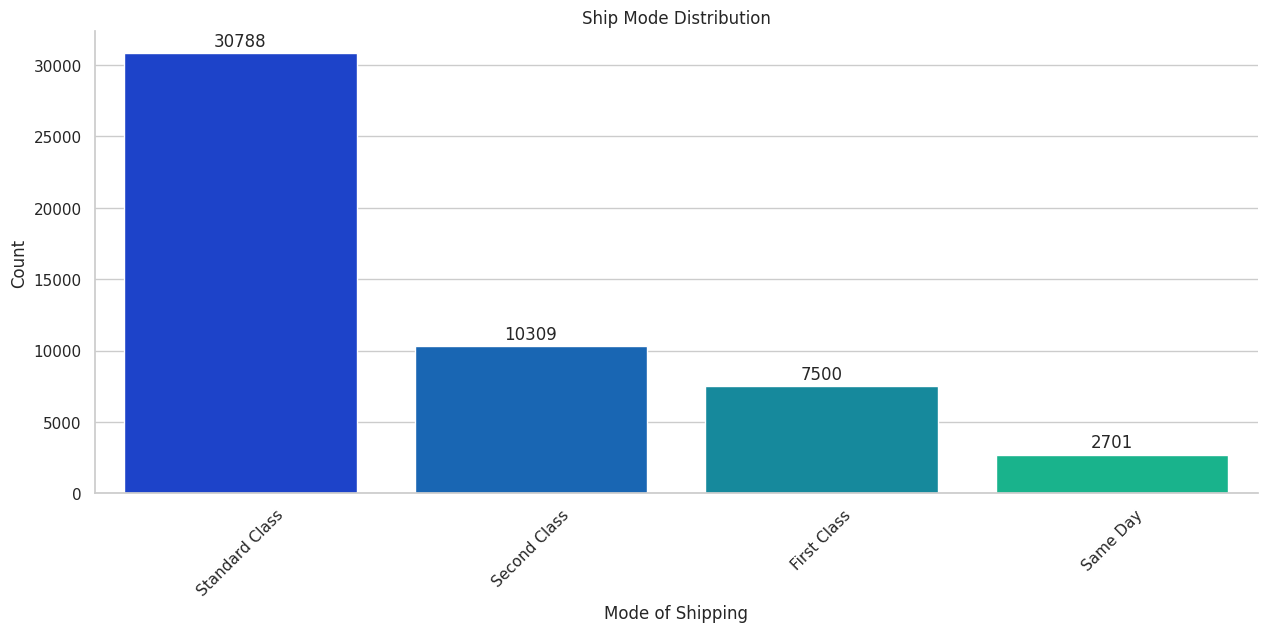

In [ ]:
df_ship_mode = df['ship_mode'].value_counts().reset_index()
df_ship_mode.columns = ['ship_mode', 'count']

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=df_ship_mode, x='ship_mode', y='count', palette="winter")

ax.set_title('Ship Mode Distribution')
ax.set_xlabel('Mode of Shipping')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xticks(rotation=45)
sns.despine()

plt.show()

<div class="alert alert-info">
  <p>Standard Class shipment adalah yang paling banyak diminati diantara metode pengiriman. Prilaku seperti ini bisa jadi karena kebanyakan pelangga standard delivery daripada harus membayar lebih</p>
</div>

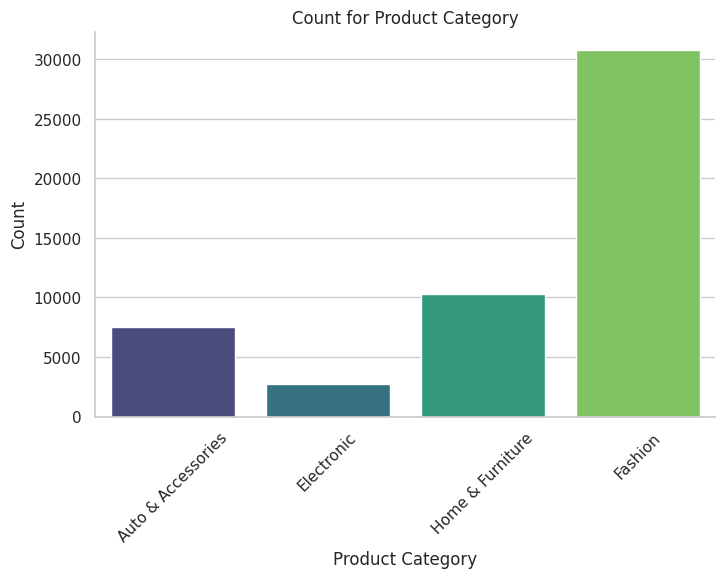

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='product_category', data=df, palette='viridis')

ax.set_title('Count for Product Category')

plt.xticks(rotation=45)
ax.set_xlabel('Product Category')
ax.set_ylabel('Count')

sns.despine()

plt.show()

<div class="alert alert-info">
<p>Dari sisi kategori product, Fashion adalah product yang paling diminati oleh pelanggan</p>
</div>

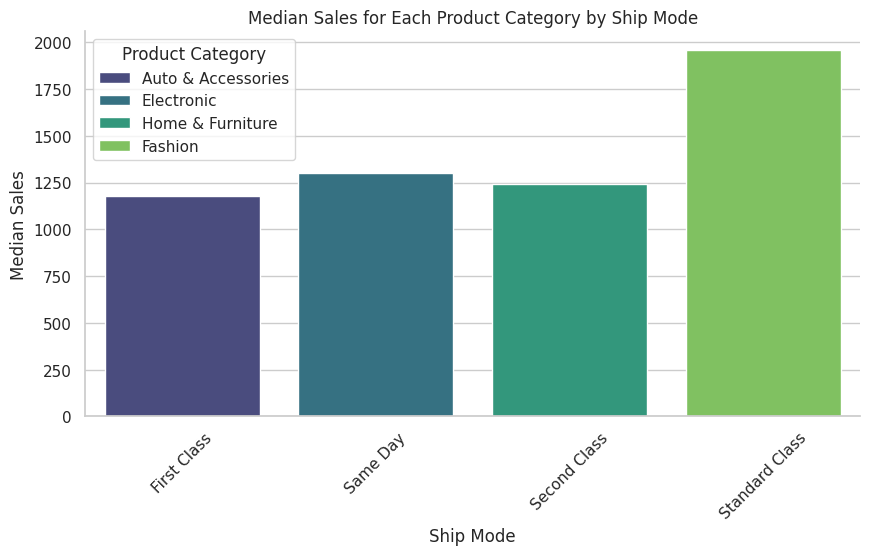

In [ ]:
median_sales = df.groupby(['ship_mode', 'product_category'])['sales'].median().reset_index()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='ship_mode', y='sales', hue='product_category', data=median_sales, palette='viridis')

ax.set_title('Median Sales for Each Product Category by Ship Mode')
ax.set_xlabel('Ship Mode')
ax.set_ylabel('Median Sales')

plt.legend(title='Product Category')

plt.xticks(rotation=45)

sns.despine()

plt.show()

<div class="alert alert-info">
<p>Standard class menjadi metode pengiriman yang lebih banyak menghasilkan sales(penjualan) daripada metode lain. Ini dikarenakan banyak pelanggan yang memesan product category Fashion mengguanakan metode tersebut.</p>
</div>

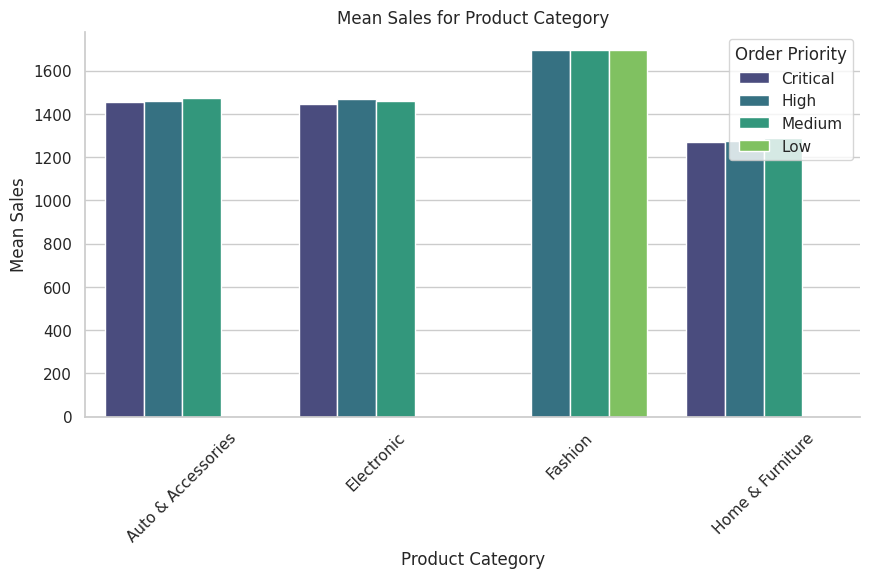

In [ ]:
mean_sales = df.groupby(['product_category', 'order_priority'])['sales'].mean().reset_index()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='product_category', y='sales', hue='order_priority', data=mean_sales, palette='viridis')

ax.set_title('Mean Sales for Product Category')
ax.set_xlabel('Product Category')
ax.set_ylabel('Mean Sales')

plt.legend(title='Order Priority')
plt.xticks(rotation=45)
sns.despine()

plt.show()

Order Priority dari kategori selain fashion memiliki priority critical, sementara priority dari fashion memiliki low priority tidak seperti kategori lain. Dari sini bisa kia asumsikan faktor ini lah yang mempunyai pengaruh terhadap banyaknya Standard class ship mode

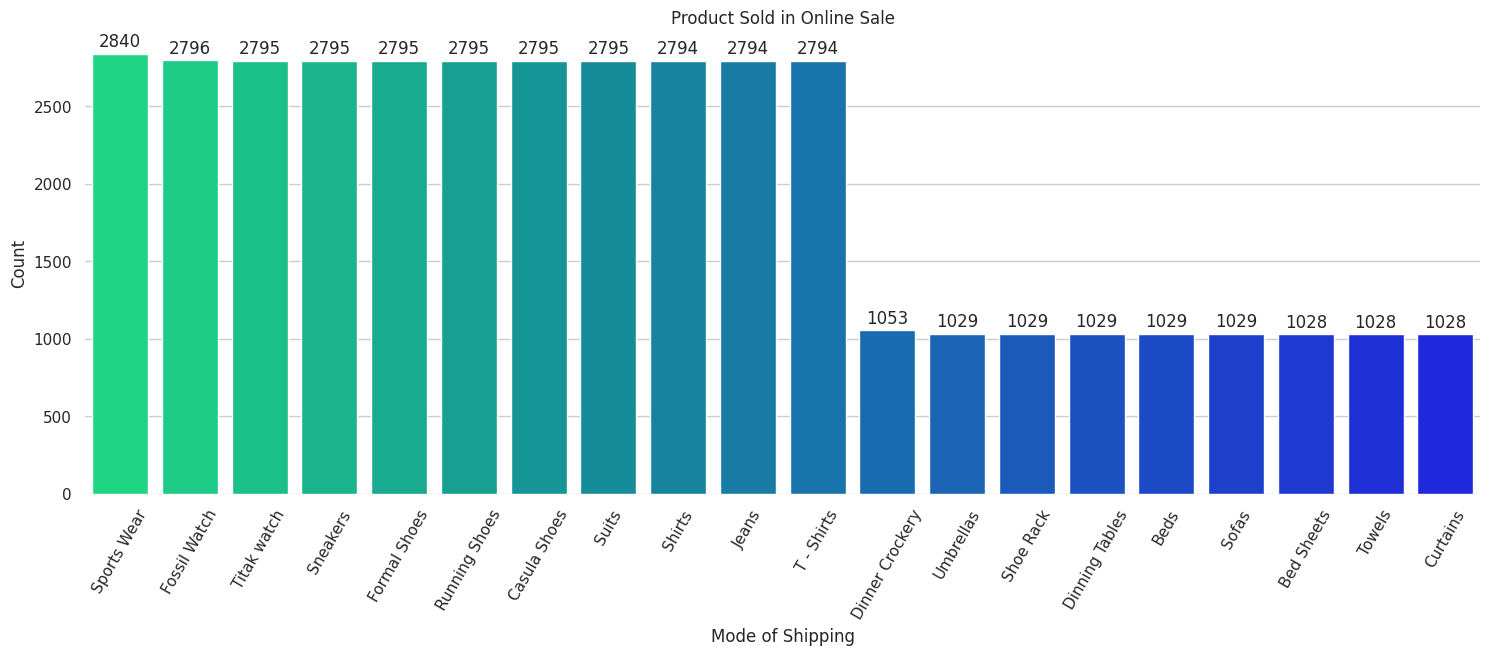

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(18,6))
#Sort descending berdasarkan count ambil hanya 20 rows
df_prod=df['product'].value_counts().sort_values(ascending=False).to_frame()[:20]
ax=sns.barplot(data=df_prod,x=df_prod.index,y='product',palette="winter_r")
ax.set_title('Product Sold in Online Sale')

ax.set_xlabel('Mode of Shipping')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '1.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

plt.show()

<div class="alert alert-info">
  <p>Sportswear adalah yang paling banyak diminati oleh pelanggan diikuti dengan Fosil Watch, Sneakers, Formal Shoes, casual, Shoes, Suits, Jeans, dan T-shirt.</p>
</div>

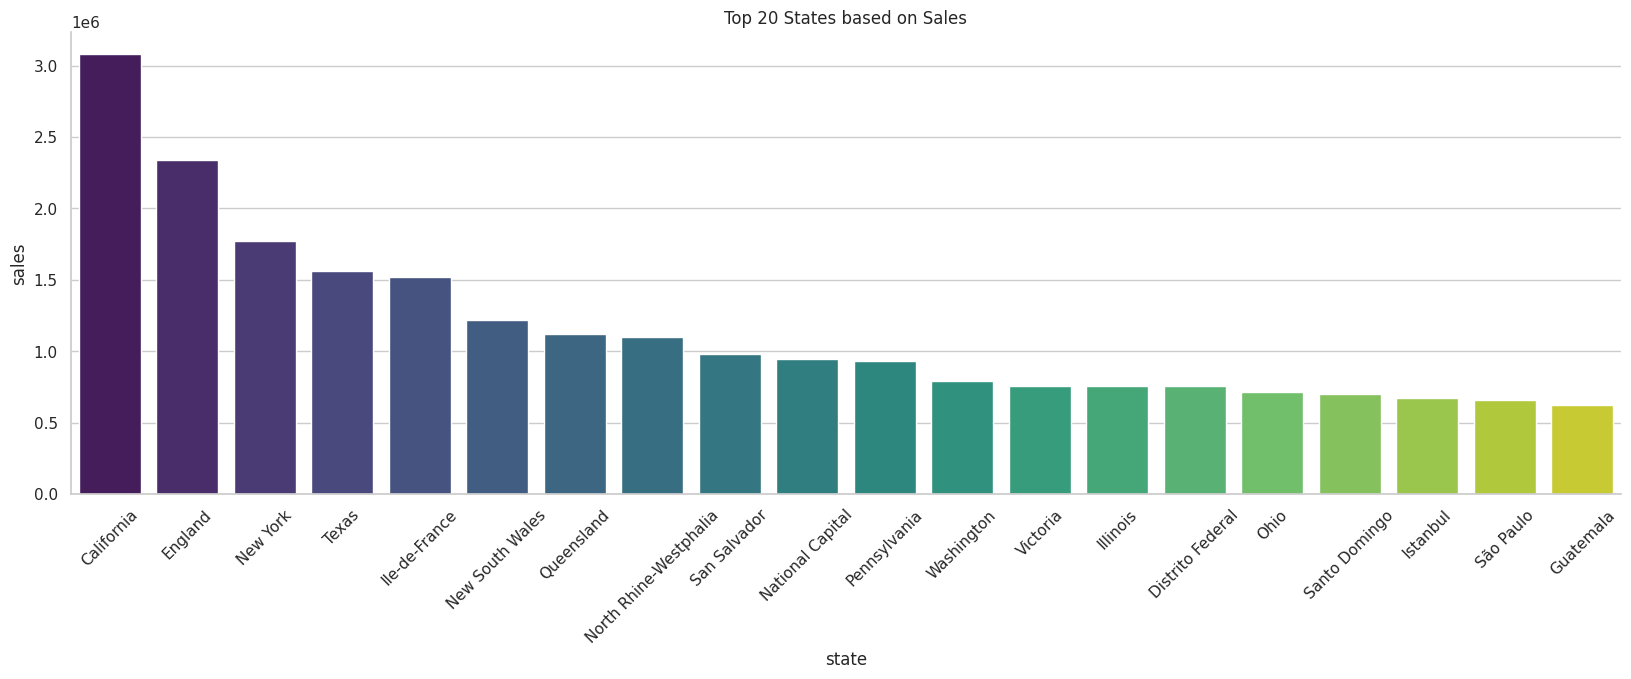

In [ ]:
grpcount = pd.DataFrame(df.groupby('state')['sales'].sum()).reset_index()
grpcount_ = grpcount.sort_values(by = 'sales', ascending = False)

top_20_states = grpcount_.iloc[:20]

plt.figure(figsize=(20, 6))
ax = sns.barplot(x='state', y='sales', data=top_20_states, palette='viridis')

ax.set_title('Top 20 States based on Sales')
plt.xticks(rotation=45)

sns.despine()

plt.show()

<div class="alert alert-info">
  <p>California menjadi provisi yang paling banyak pelanggan yang membeli diikuti dengan England, UK dan New York, US</p>
</div>

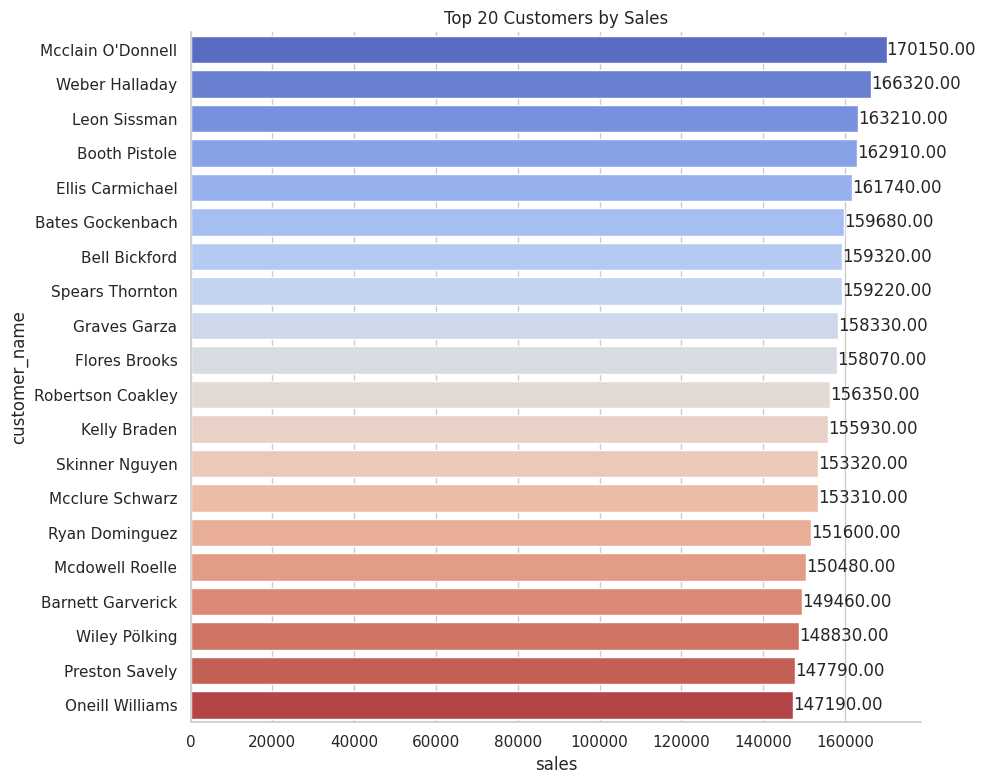

In [ ]:
grpcount = pd.DataFrame(df.groupby('customer_name')['sales'].sum()).reset_index()
grpcount_ = grpcount.sort_values(by = 'sales', ascending = False)

top_20_customers = grpcount_.iloc[:20]

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='sales', y='customer_name', data=top_20_customers, palette='coolwarm')

ax.set_title('Top 20 Customers by Sales')

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2.,
             '{:1.2f}'.format(width),
             ha='left', va='center')

plt.tight_layout()

sns.despine()

plt.show()

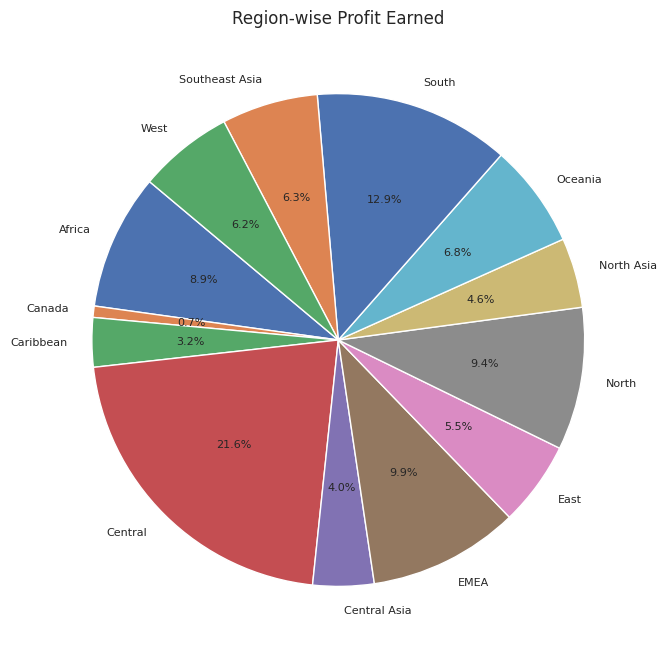

In [ ]:
region_profit = df.groupby('region')['profit'].sum().reset_index()
labels = region_profit['region']
sizes = region_profit['profit']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})
plt.title('Region-wise Profit Earned')

plt.show()

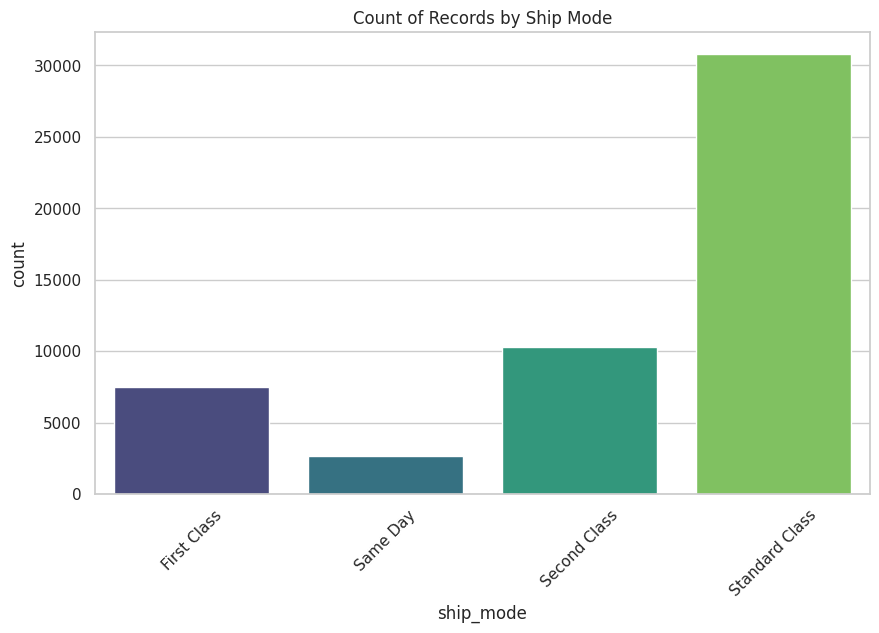

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ship_mode', data=df, palette='viridis')
ax.set_title('Count of Records by Ship Mode')
plt.xticks(rotation=45)

plt.show()

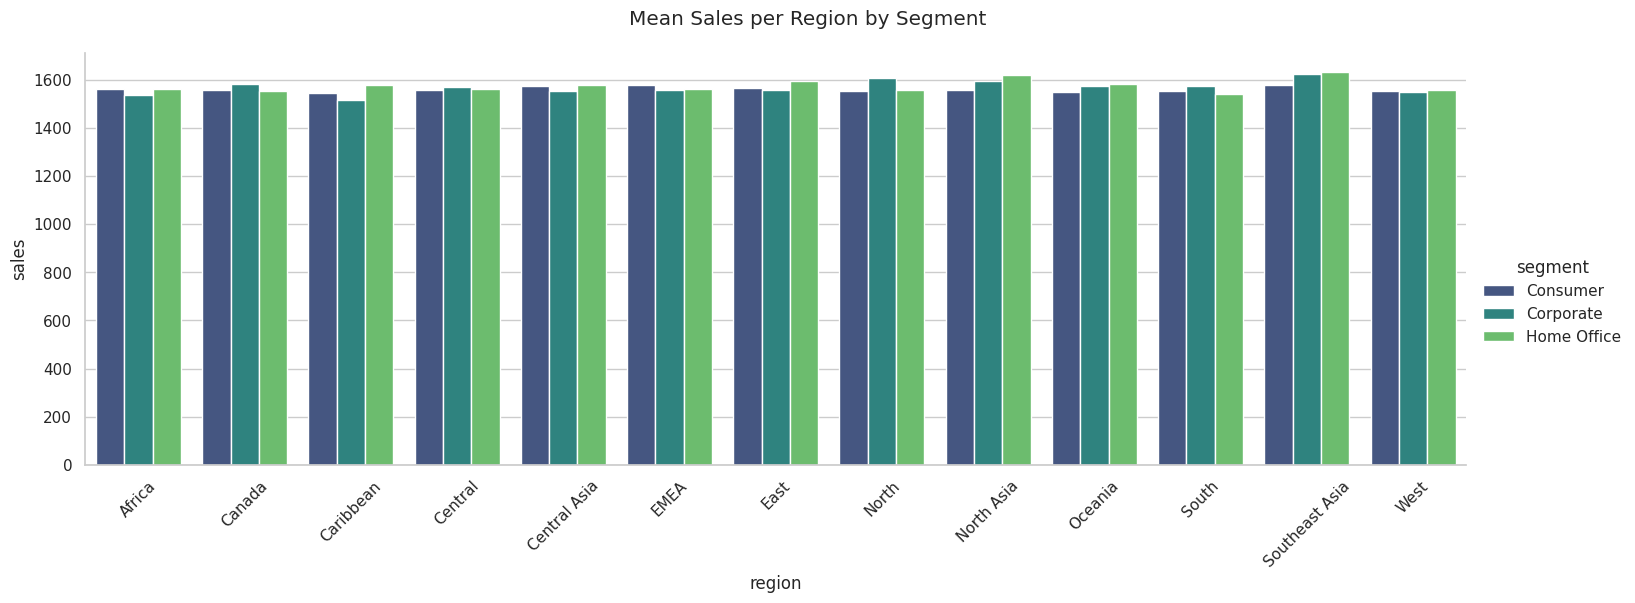

In [ ]:
mean_sales = df.groupby(['region', 'segment'])['sales'].mean().reset_index()

g = sns.catplot(x='region', y='sales', hue='segment', data=mean_sales, kind='bar', height=5, aspect=3, palette='viridis')
g.fig.suptitle('Mean Sales per Region by Segment', y=1.05)

plt.xticks(rotation=45)

plt.show()

In [ ]:
df.drop(df.index[321],inplace=True)
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])
df['quantity'] = pd.to_numeric(df['quantity'])

#delay dalam pengiriman
df['lapsdays'] = (df['ship_date'] - df['order_date']).dt.days

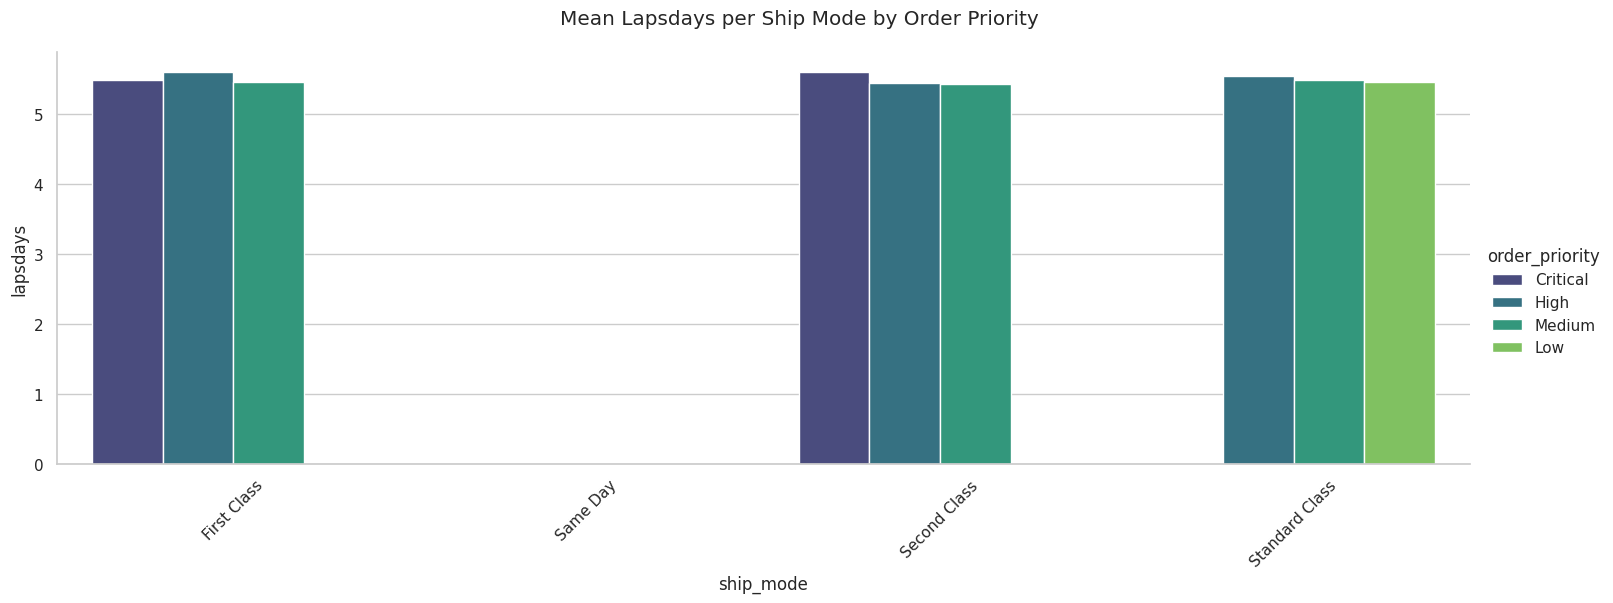

In [ ]:
mean_lapsdays = df.groupby(['ship_mode', 'order_priority'])['lapsdays'].mean().reset_index()
g = sns.catplot(x='ship_mode', y='lapsdays', hue='order_priority', data=mean_lapsdays,
                kind='bar', height=5, aspect=3, palette='viridis')
g.fig.suptitle('Mean Lapsdays per Ship Mode by Order Priority', y=1.05)

plt.xticks(rotation=45)

plt.show()

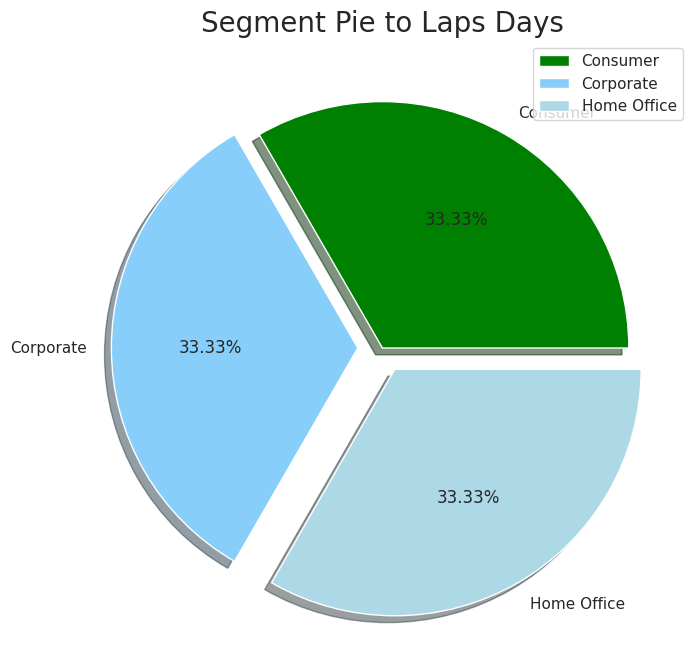

In [ ]:
grpcount = pd.DataFrame(df.groupby('segment')['lapsdays'].sum()).reset_index()
grpcount_ = grpcount.sort_values(by = 'lapsdays', ascending = False)

labels = ['Consumer', 'Corporate','Home Office']
size = grpcount_['segment'].value_counts()
colors = ['green', 'lightskyblue','lightblue']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Segment Pie to Laps Days', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

<div class="alert alert-info">
  <p>Hampir semua ship mode terkena delay untuk semua ship mode kecuali same day</p>
</div>

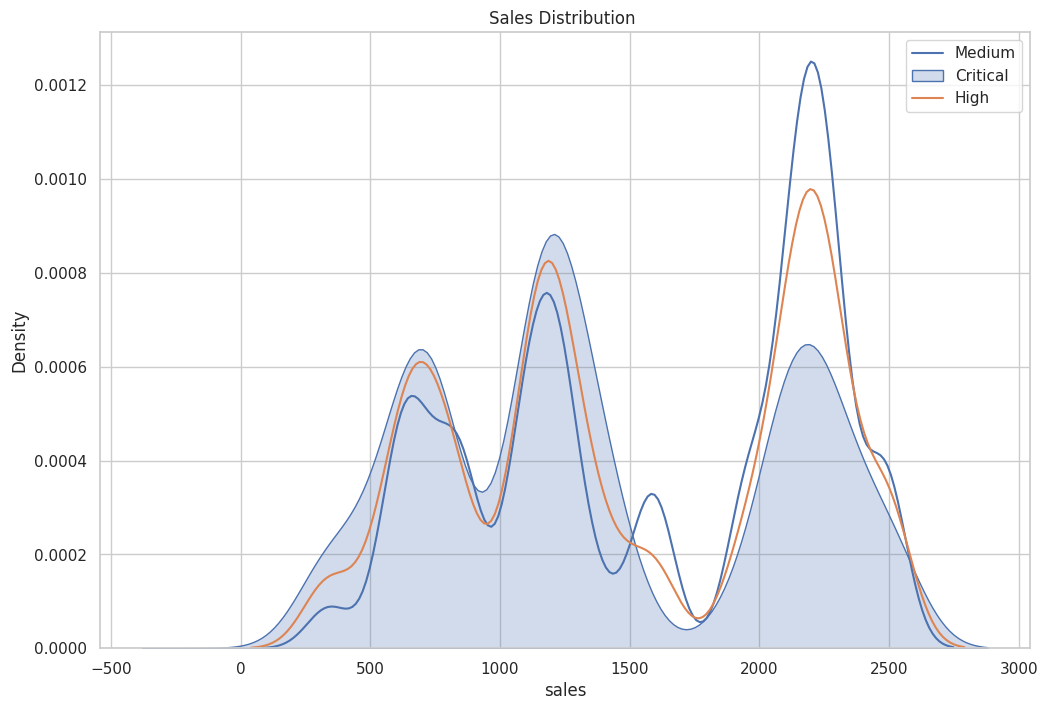

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['sales'][df.order_priority == 'Medium'], shade=False)
sns.kdeplot(df['sales'][df.order_priority == 'Critical'], shade=True)
sns.kdeplot(df['sales'][df.order_priority == 'High'], shade=False)
plt.legend(['Medium', 'Critical','High'])
plt.title('Sales Distribution ')
plt.show()

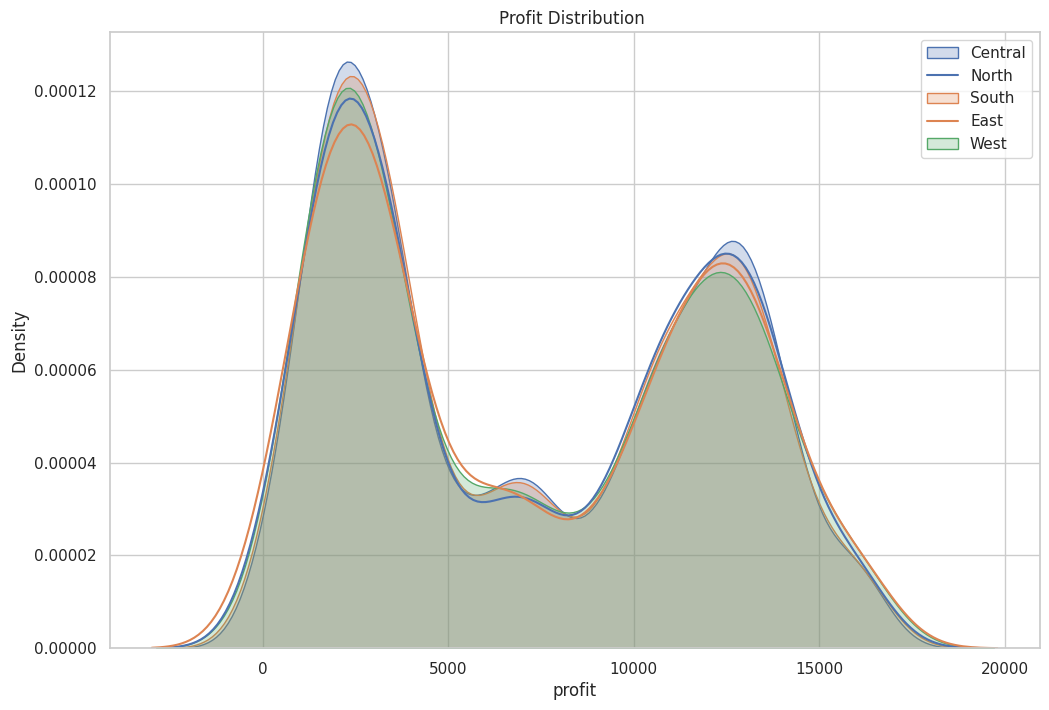

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['profit'][df.region == 'Central'], shade=True)
sns.kdeplot(df['profit'][df.region == 'North'], shade=False)
sns.kdeplot(df['profit'][df.region == 'South'], shade=True)
sns.kdeplot(df['profit'][df.region == 'East'], shade=False)
sns.kdeplot(df['profit'][df.region == 'West'], shade=True)

plt.legend(['Central', 'North','South','East','West'])
plt.title('Profit Distribution ')
plt.show()

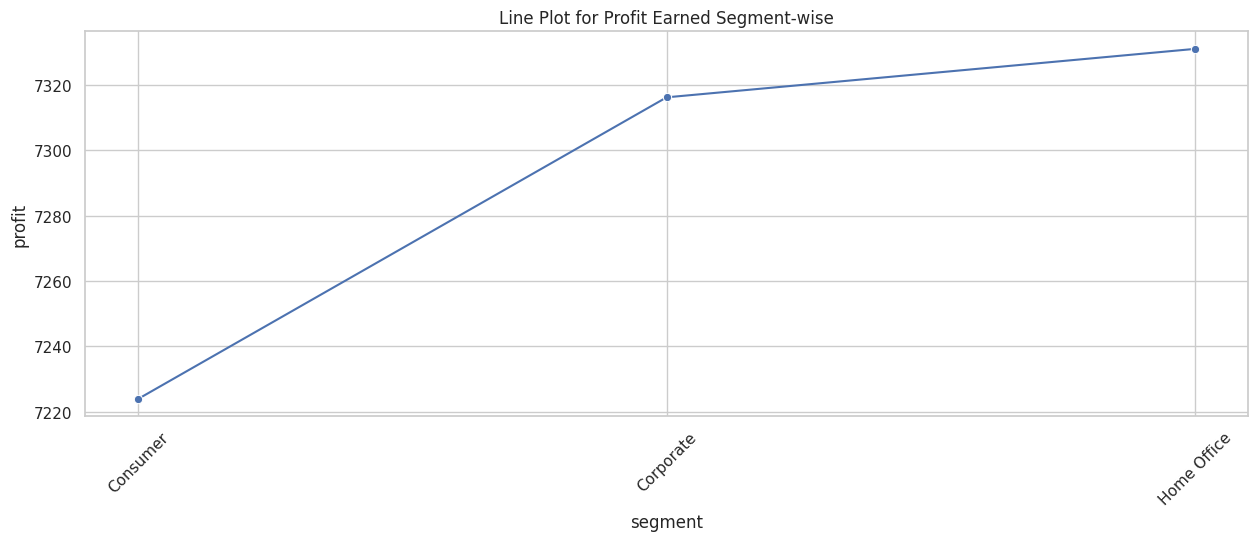

In [ ]:
mean_profit = df.groupby('segment')['profit'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='segment', y='profit', data=mean_profit, marker='o')

ax.set_title('Line Plot for Profit Earned Segment-wise')
plt.xticks(rotation=45)

plt.show()

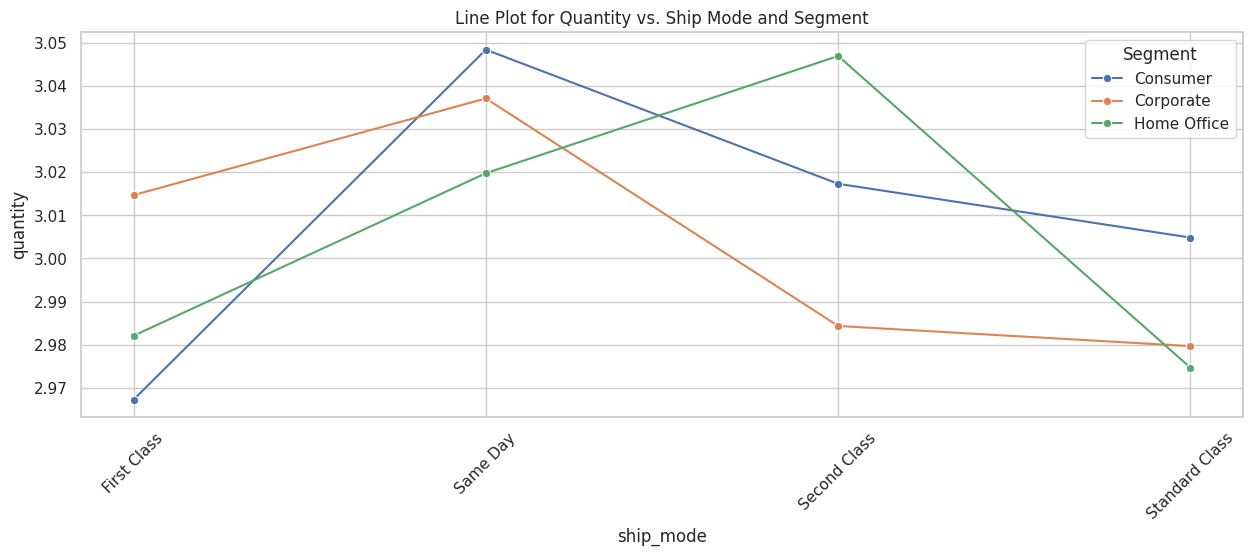

In [ ]:
mean_quantity = df.groupby(['ship_mode', 'segment'])['quantity'].mean().reset_index()

plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='ship_mode', y='quantity', hue='segment', data=mean_quantity, marker='o')

ax.set_title('Line Plot for Quantity vs. Ship Mode and Segment')
plt.legend(title='Segment')
plt.xticks(rotation=45)

plt.show()

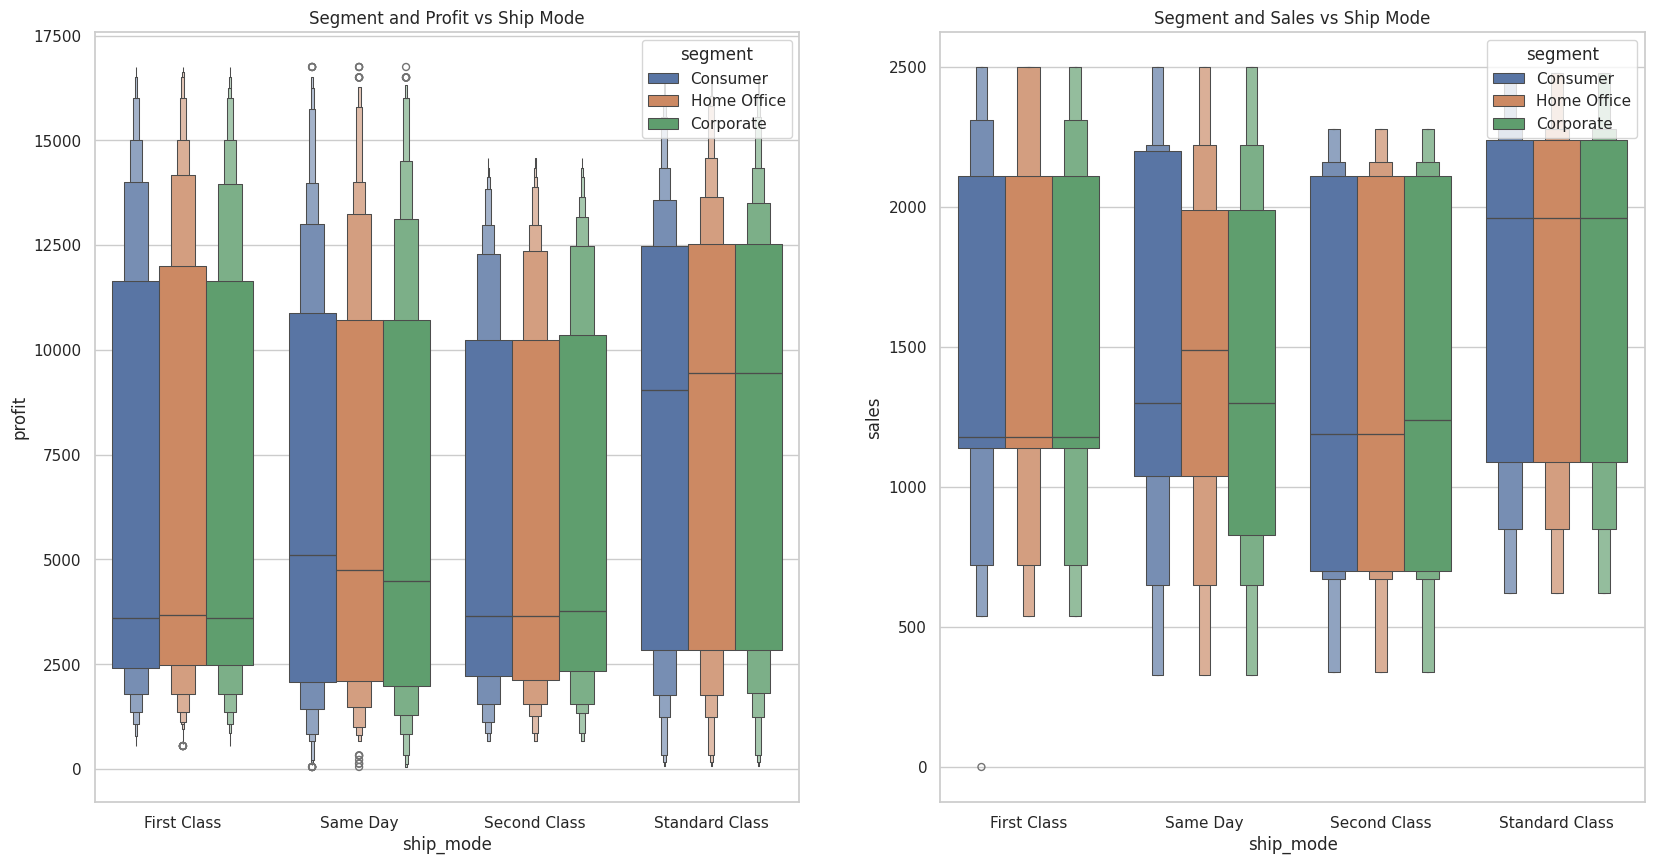

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.boxenplot(x="ship_mode", y="profit", hue="segment", data=df, ax=ax[0])
ax[0].set_title('Segment and Profit vs Ship Mode')

sns.boxenplot(x="ship_mode", y="sales", hue="segment", data=df, ax=ax[1])
ax[1].set_title('Segment and Sales vs Ship Mode')

plt.show()

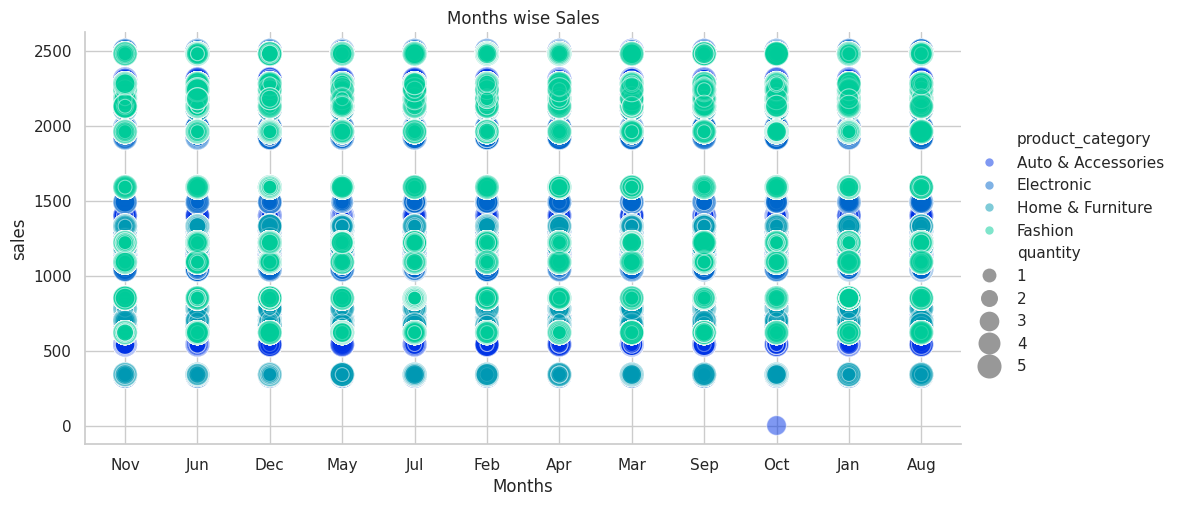

In [ ]:
axes = sns.relplot(x="months", y="sales", hue="product_category",
                size="quantity", data=df,palette='winter', sizes=(100, 300),alpha=0.5,aspect=2)
axes.set(xlabel='Months',title="Months wise Sales")

axes.set_xticklabels()

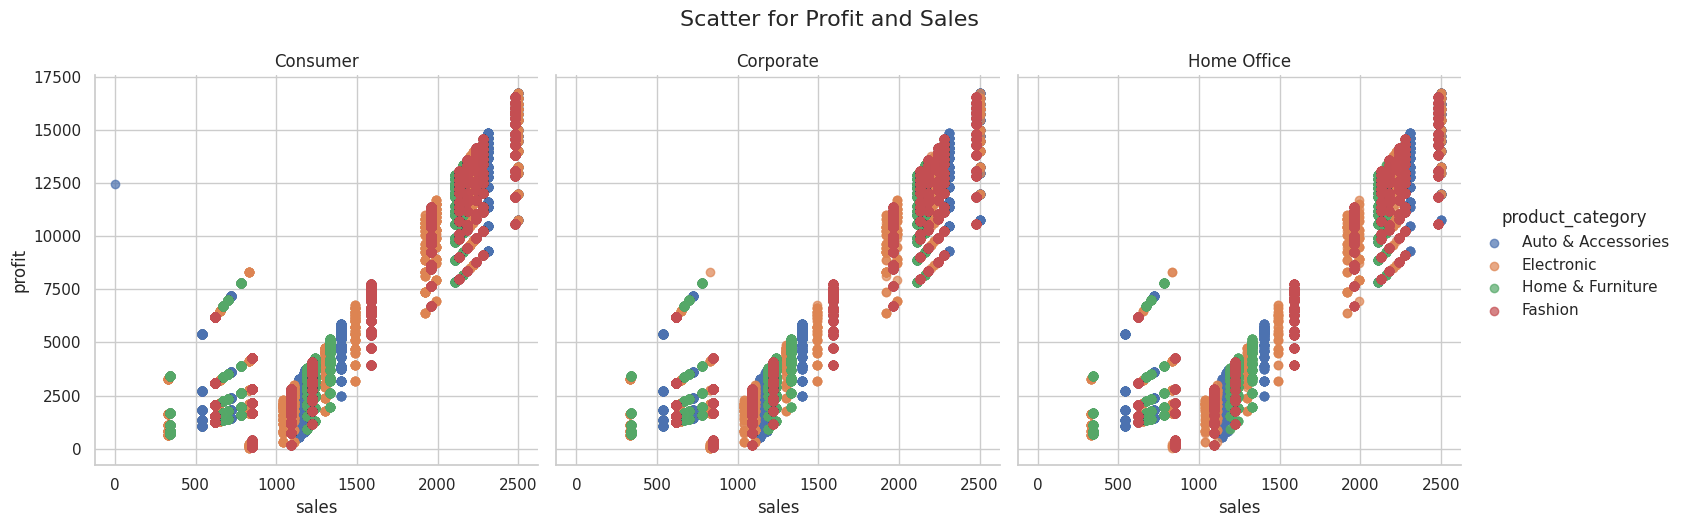

In [ ]:
# dxp.scatter(x='sales', y='profit', data=df, split='product_category', col='segment', col_order=['Consumer','Corporate'],title = 'Scatter for Profit and Sales')

g = sns.FacetGrid(df, col='segment', col_order=['Consumer', 'Corporate','Home Office'], hue='product_category', height=5, aspect=1)
g.map(plt.scatter, 'sales', 'profit', alpha=.7)
g.add_legend()

g.set_titles('{col_name}')
g.fig.suptitle('Scatter for Profit and Sales', fontsize=16, y=1.05)

plt.show()

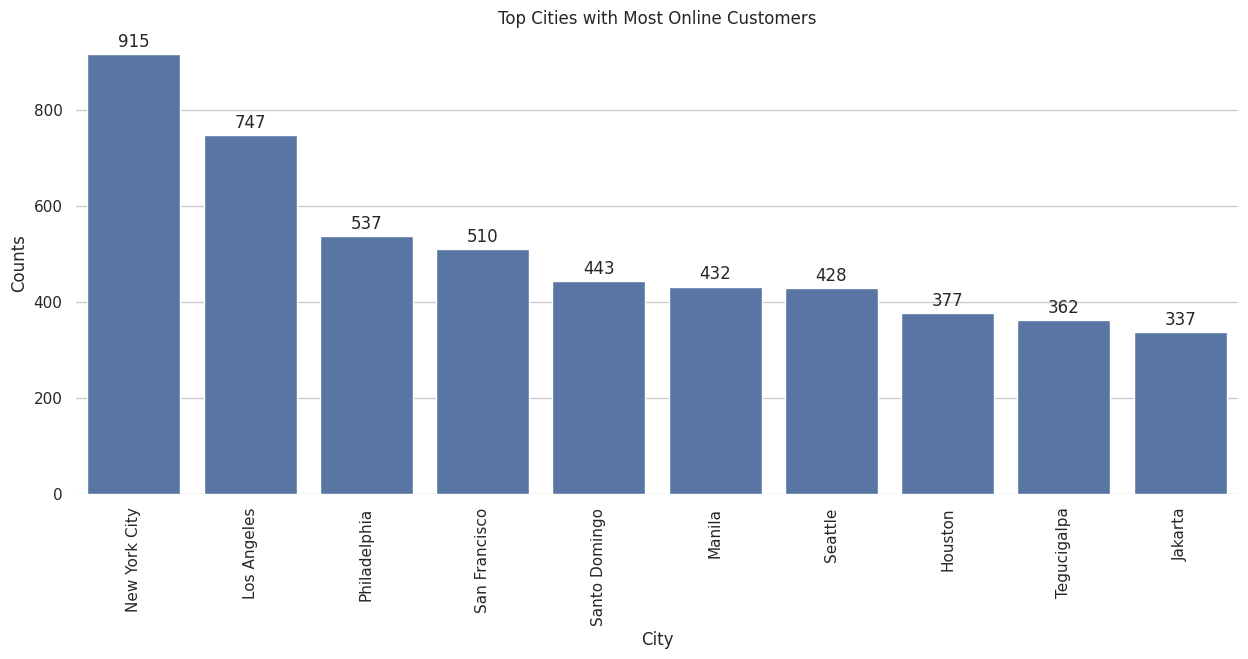

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,6))
XP=df.city.value_counts().sort_values(ascending=False).to_frame()[:10]
ax=sns.barplot(data=XP,x=XP.index,y='city')
ax.set_title('Top Cities with Most Online Customers')

ax.set_xlabel('City')
ax.set_ylabel('Counts')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '1.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Homework

Buat analisis tambahan berdasarkan data di atas, gunakan chart sesuai dengan analisis yang dibutuhkan menggunakan Python & Google Data Studio (looker studio)

1.   Bagaimana tren penjualan di benua Asia tahun ke tahun?
2.   Negara mana saja yang memiliki potensti untuk menghasilkan keuntungan (profit) paling besar sesudah urutan pertama?
3.   Siapakah 5 pembeli yang paling banyak membeli (Count) dari data ini?
4.   Dari rata-rata antar region, product category apakah yang paling banyak diminati?
5.   Untuk mencapai maksimum profit, barang apa sajakah yang harus di stok lebih banyak oleh toko untuk kedepannya?

In [ ]:
df.to_excel("dataset_ecommerce_cleaned.xlsx")

In [ ]:
df['year'] = df['order_date'].dt.year

In [ ]:
df.head()

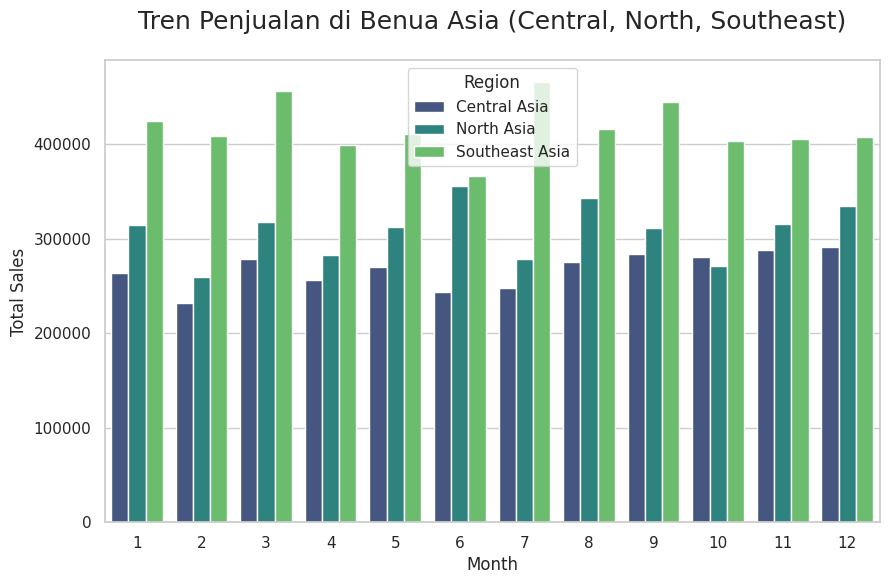

In [ ]:
df['month'] = df['order_date'].dt.month

filtered_df = df[(df['region'] == 'Central Asia') | (df['region'] == 'North Asia') | (df['region'] == 'Southeast Asia')]

monthly_sales_by_region = filtered_df.groupby(['month', 'region'])['sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='sales', hue='region', data=monthly_sales_by_region, palette='viridis')
plt.title('Tren Penjualan di Benua Asia (Central, North, Southeast)',y=1.05,fontsize=18 )
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.show()

Berdasarkan data yang diperoleh Southeast Asia menjadi region di Asia yang memiliki tren penjualan atau total sales tertingi sejak Januari 2015 sampai Desember 2015, diikuti oleh region North Asia dan Central Asia. Total sales untuk region Asia tidak ada penjualan di tahun 2016.

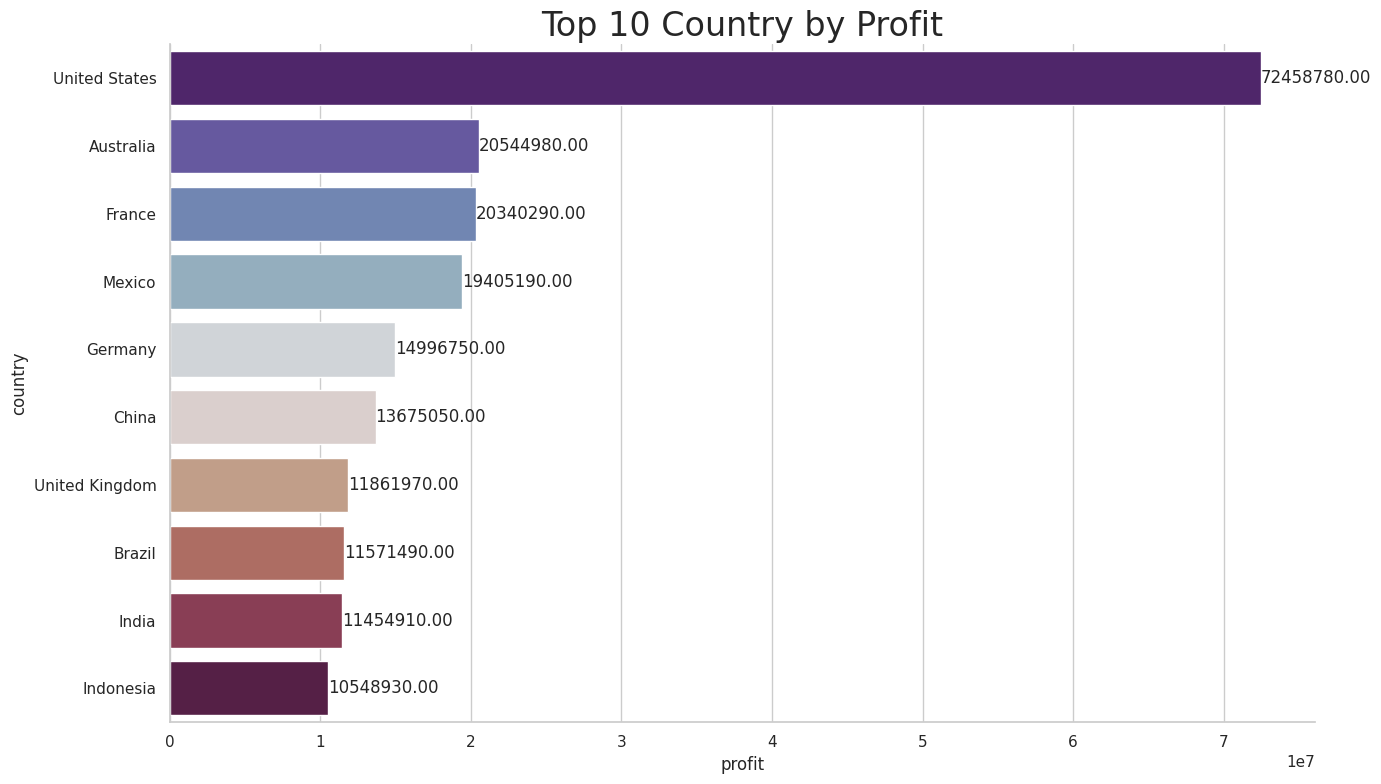

In [ ]:
top_country_count = pd.DataFrame(df.groupby('country')['profit'].sum()).reset_index()
top_country_count = top_country_count.sort_values(by = 'profit', ascending = False)

top_country_count = top_country_count.iloc[:10]

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='profit', y='country', data=top_country_count, palette='twilight_shifted')

ax.set_title('Top 10 Country by Profit', fontsize=24)

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2.,
             '{:1.2f}'.format(width),
             ha='left', va='center')

plt.tight_layout()

sns.despine()

plt.show()

Setelah United States yang menjadi negara dengan profit terbesar di dunia, Australia menjadi negara berikutnya dengan profit terbesar diikuti dengan France dan Mexico.

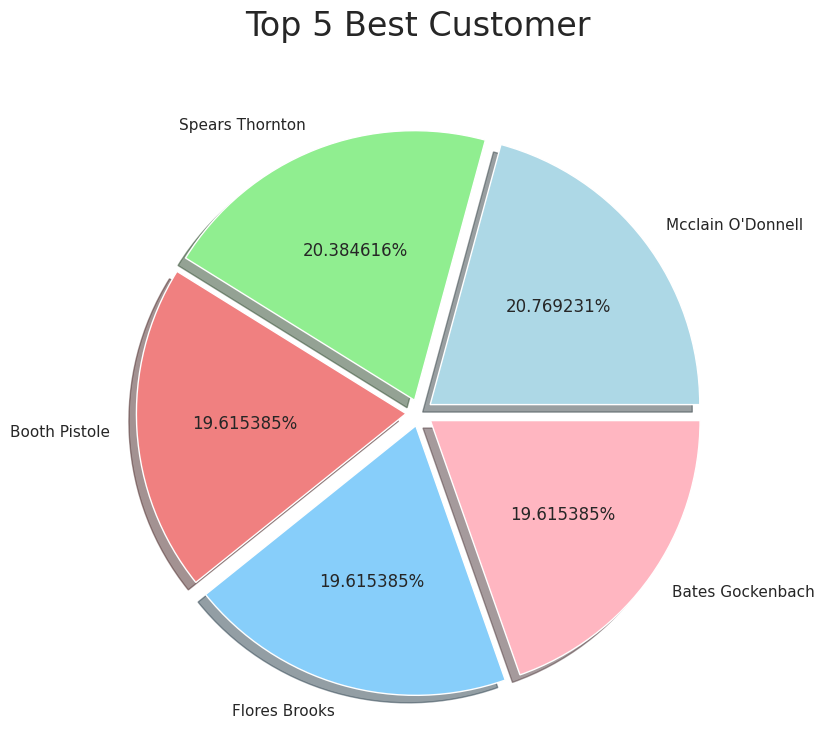

In [ ]:
result_top_orders = df.groupby('customer_name').agg({'order_id': pd.Series.nunique}).sort_values(by='order_id', ascending=False).reset_index().head(5)
explode = [0.05, 0.05,0.05,0.05,0.05]
colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

plt.figure(figsize=(8, 8))
plt.pie(result_top_orders['order_id'], labels=result_top_orders['customer_name'], explode = explode,shadow = True, autopct='%2f%%',colors=colors )
plt.title('Top 5 Best Customer',y=1.1, fontsize = 24)
plt.axis('equal')

plt.show()

Dari data diatas, 5 customer yang paling sering membeli di ecommerce yaitu Micclain O'Donnell, Spears Thornton, Bates Gockenbach, Booth Pistole, dan Flores Brooks.

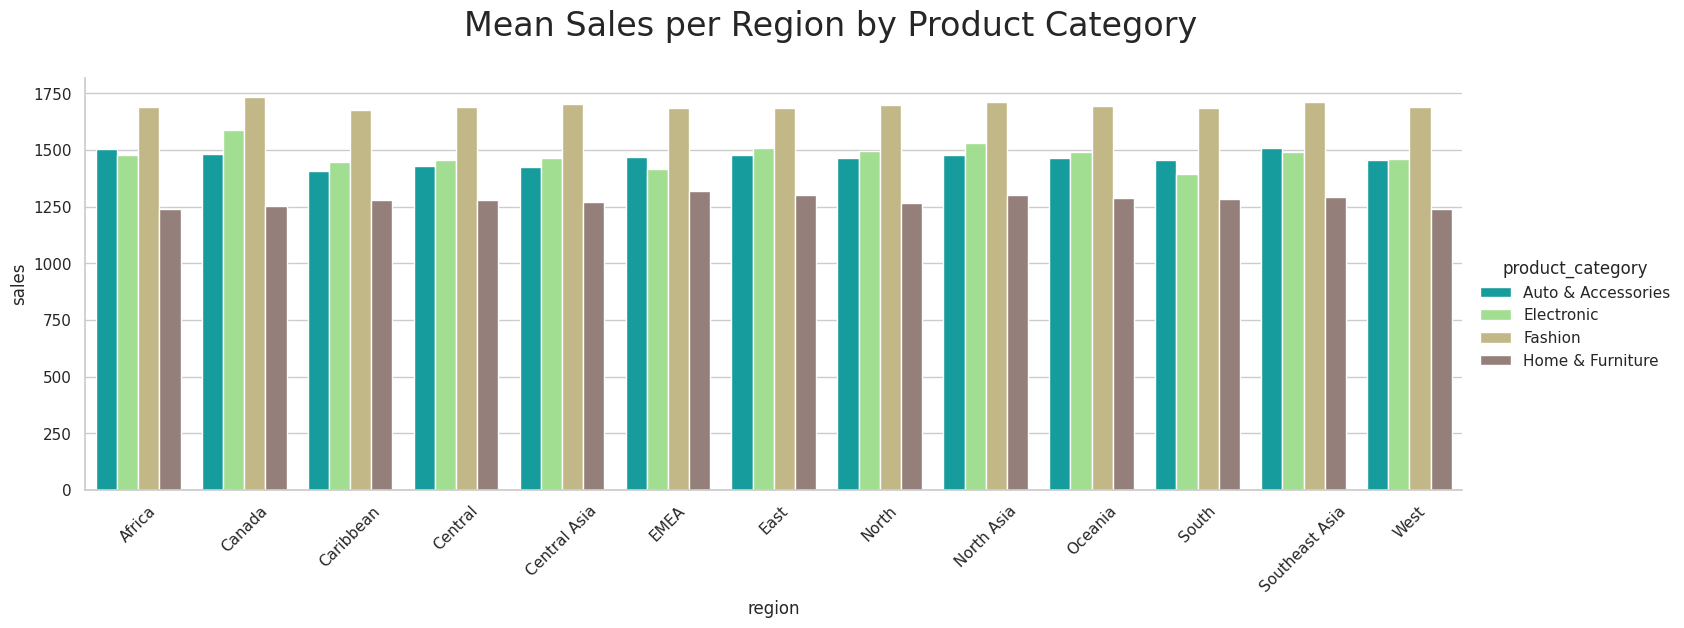

In [ ]:
mean_sales_per_region = df.groupby(['region', 'product_category'])['sales'].mean().reset_index()

g = sns.catplot(x='region', y='sales', hue='product_category', data=mean_sales_per_region, kind='bar', height=5, aspect=3, palette='terrain')
g.fig.suptitle('Mean Sales per Region by Product Category', y=1.1, fontsize=24)

plt.xticks(rotation=45)

plt.show()

Product category Fashion menjadi category yang paling banyak diminati di semua region di dunia berdasarkan data rata-rata penjualan sales, kemudian category Electronic dan category Auto & Accessories menjadi category yang diminati berikutnya serta category Home & Furniture menjadi product category yang paling kecil diminati dibandingkan category lainnya.

In [ ]:
print(f'The earliest date is {df["order_date"].min()}')
print(f'The latest date is {df["order_date"].max()}')

The earliest date is 2015-01-01 00:00:00
The latest date is 2016-01-02 00:00:00


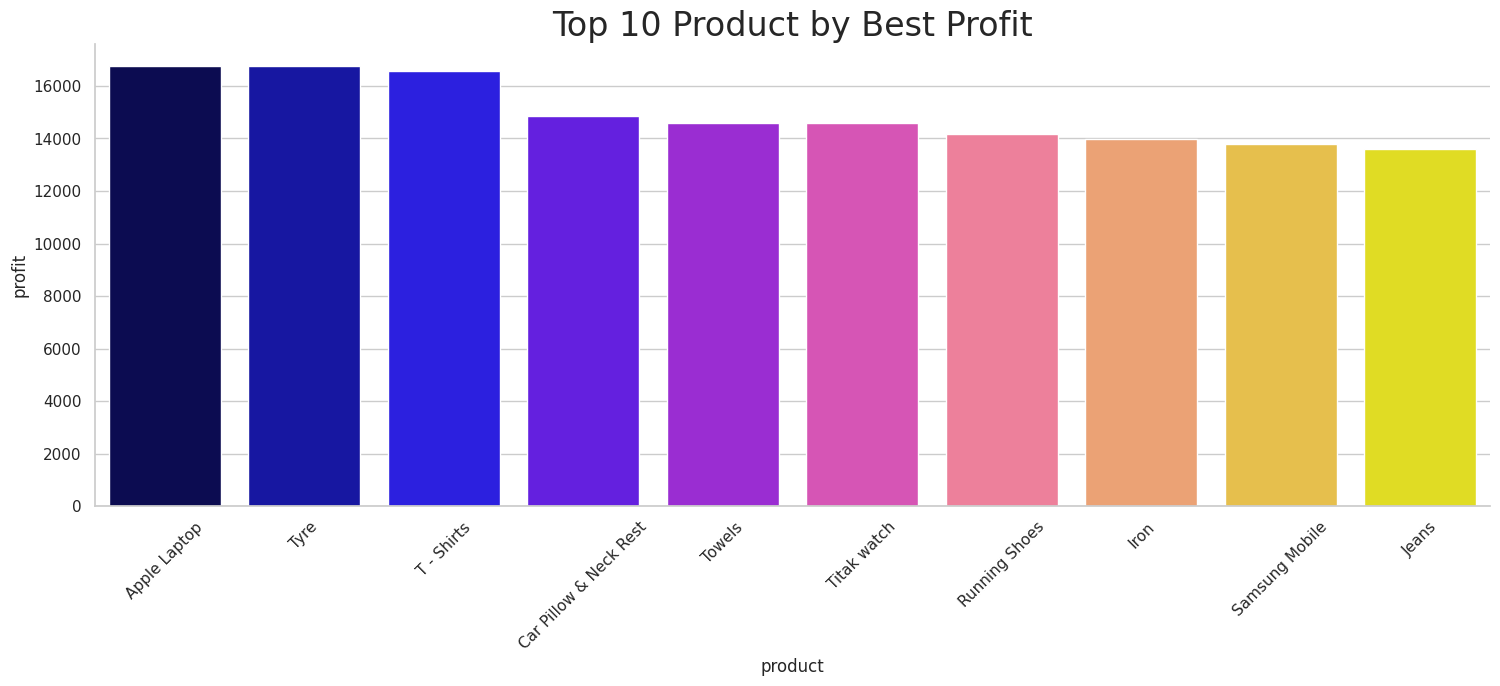

In [ ]:
best_profit_by_product = pd.DataFrame(df.groupby('product')['profit'].max()).reset_index()
best_profit_by_product = best_profit_by_product.sort_values(by = 'profit', ascending = False)

top_10_best_product = best_profit_by_product.iloc[:10]

plt.figure(figsize=(18, 6))
ax = sns.barplot(x='product', y='profit', data=top_10_best_product, palette='gnuplot2')

ax.set_title('Top 10 Product by Max Profit', fontsize=24)
plt.xticks(rotation=45)

sns.despine()

plt.show()

Untuk mencapai maksimum profit, perusahaan harus merestock 10 product dengan profit terbesar yaitu Apple Laptop, Tyre, T-shirt, Car Pillow & Nect Rest, Towels, Titak watch, Running shoes, Iron, Samsung Mobile, dan Jeans.